<a href="https://colab.research.google.com/github/JjMyDamnSon/AI_sub/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Importing the data set from Kaggle**

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/JjMyDamnSon/AI_sub/refs/heads/main/ecommerce_customer_data_custom_ratios.csv"
data = pd.read_csv(url)

data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


## **Data Preprocessing**

In [20]:
#sort Purchase Date attribute ascendingly


data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce')
data = data.sort_values(by='Purchase Date', ascending=True)

data.head()




,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
78366,25337,2020-01-01 00:15:00,Home,32,2,2525,Cash,42,0.0,Justin Sanchez,42,Female,0
249751,32242,2020-01-01 00:15:15,Home,161,5,2788,PayPal,60,1.0,Rebecca Mcdaniel,60,Female,1
201096,14853,2020-01-01 00:22:42,Books,93,2,690,PayPal,53,0.0,Pamela Mcdowell,53,Male,0
45577,32581,2020-01-01 00:31:11,Clothing,375,1,2368,PayPal,21,NaN,Janice Oconnor,21,Female,1
1460,16006,2020-01-01 00:34:38,Electronics,125,1,1649,Credit Card,37,1.0,Brian Williams,37,Female,0


In [21]:
#convert Total Purchase Amount into categorical ranges based on quantiles

Q1 = data['Total Purchase Amount'].quantile(0.25)
Q2 = data['Total Purchase Amount'].quantile(0.50)
Q3 = data['Total Purchase Amount'].quantile(0.75)
min_value = data['Total Purchase Amount'].min()
max_value = data['Total Purchase Amount'].max()

def categorize_purchase_amount(amount):
    if amount <= Q1:
        return 'low value'
    elif amount <= Q2:
        return 'medium value'
    elif amount <= Q3:
        return 'high value'
    else:
        return 'very high value'

data['Purchase Amount Category'] = data['Total Purchase Amount'].apply(categorize_purchase_amount)

category_mapping = {
    'low value': 0,
    'medium value': 1,
    'high value': 2,
    'very high value': 3
}
data['Normalized Purchase Amount'] = data['Purchase Amount Category'].map(category_mapping)




In [23]:
import numpy as np

from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler




# Define relevant attributes
relevant_attributes = ['Product Category',
                      'Total Purchase Amount',
                      'Customer Age', 'Returns', 'Gender']

# Summary statistics for numerical attributes
numerical_attributes = [ 'Total Purchase Amount', 'Customer Age', 'Returns']

# Calculate mean, median, mode, and standard deviation for numerical attributes
means = data[numerical_attributes].mean()
medians = data[numerical_attributes].median()
std_dev = data[numerical_attributes].std()

# Display the statistics
print("\nMeans:\n", means)
print("\nMedians:\n", medians)
print("\nStandard Deviation for Numerical Attributes:\n", std_dev)

# Calculate mode for all relevant attributes, including categorical ones
modes = {}
for column in relevant_attributes:
    modes[column] = data[column].mode().iloc[0]  # Get the first mode for all attributes

print("\nModes for All Attributes:")
for key, value in modes.items():
    print(f"{key}: {value}")

# Calculate entropy for all relevant columns (excluding Purchase Date)
def calculate_entropy(column):
    if column.dtype == 'object' or column.nunique() < 10:  # Categorical
        distribution = column.value_counts(normalize=True)
        return entropy(distribution)
    elif np.issubdtype(column.dtype, np.number):  # Numerical, bin into categories
        bins = np.histogram_bin_edges(column, bins='auto')
        binned_counts = np.histogram(column, bins=bins)[0]
        distribution = binned_counts / binned_counts.sum()
        return entropy(distribution)

# Entropy calculations for relevant attributes
entropies = {col: calculate_entropy(data[col]) for col in relevant_attributes}
print("\nEntropy Values for All Relevant Attributes:")
for key, value in entropies.items():
    print(f"{key}: {value}")




Means:
 Total Purchase Amount    2725.370732
Customer Age               43.940528
Returns                     0.497861
dtype: float64

Medians:
 Total Purchase Amount    2724.0
Customer Age               44.0
Returns                     0.0
dtype: float64

Standard Deviation for Numerical Attributes:
 Total Purchase Amount    1442.933565
Customer Age               15.350246
Returns                     0.499997
dtype: float64

Modes for All Attributes:
Product Category: Clothing
Total Purchase Amount: 2786
Customer Age: 58
Returns: 0.0
Gender: Female

Entropy Values for All Relevant Attributes:
Product Category: 1.3662146996291606
Total Purchase Amount: 4.18135105788009
Customer Age: 3.9697238822818317
Returns: 0.6931380274446801
Gender: 0.6931371453263766


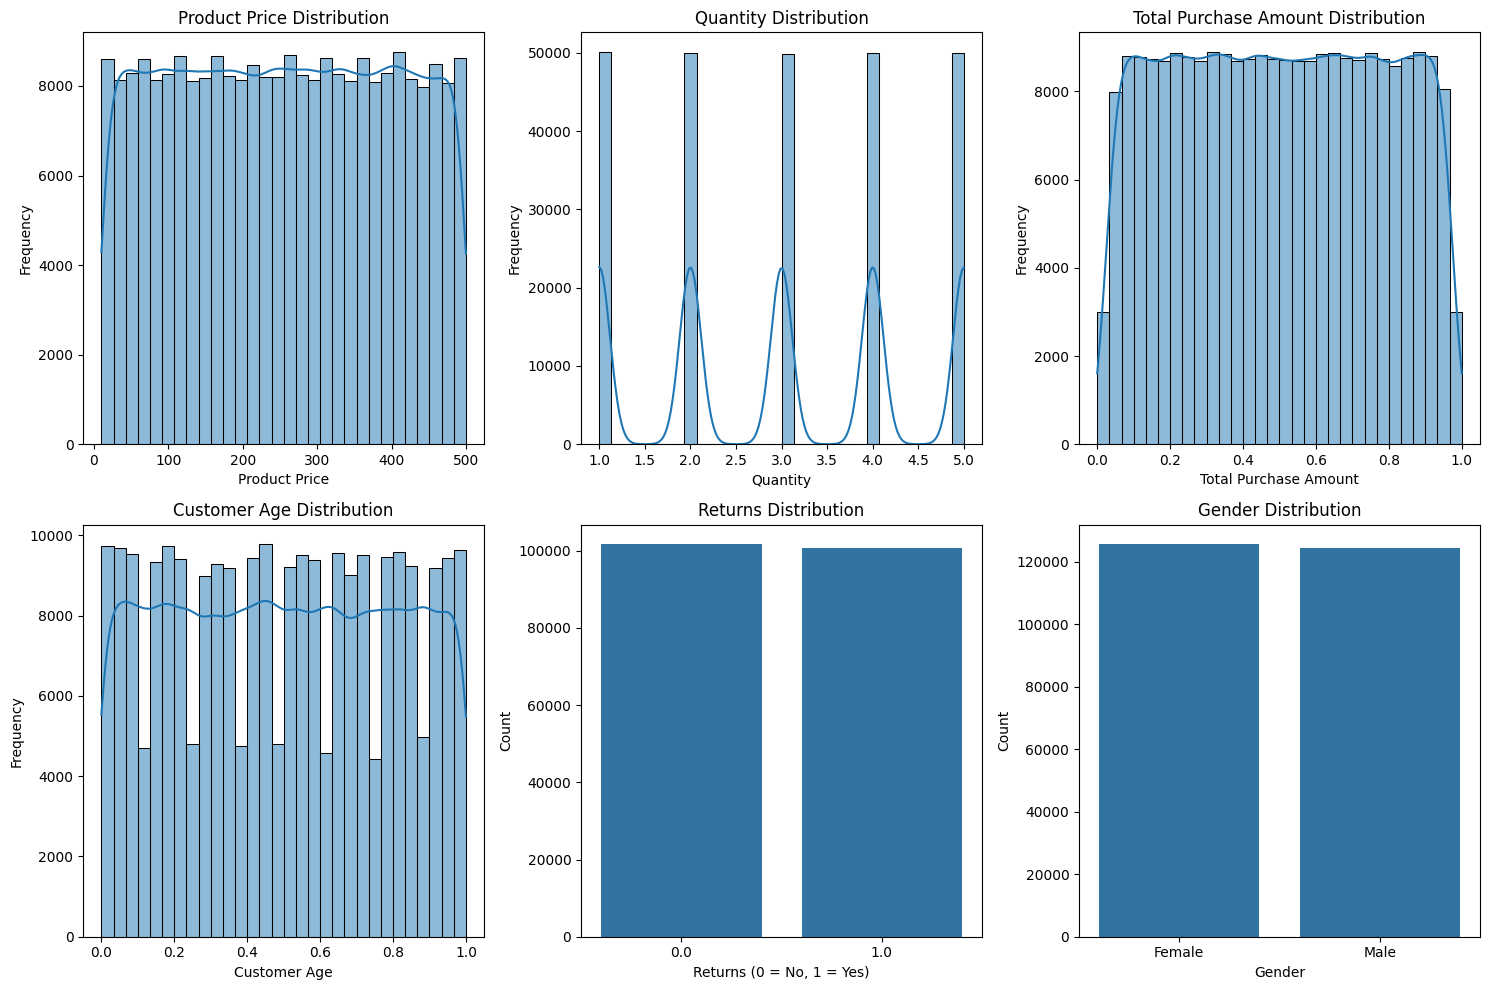

In [24]:
#visualize the distributions across different attributes
plt.figure(figsize=(15, 10))

# Product Price
plt.subplot(2, 3, 1)
sns.histplot(data['Product Price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

# Quantity
plt.subplot(2, 3, 2)
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Total Purchase Amount
plt.subplot(2, 3, 3)
sns.histplot(data['Total Purchase Amount'], bins=30, kde=True)
plt.title('Total Purchase Amount Distribution')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')

# Customer Age
plt.subplot(2, 3, 4)
sns.histplot(data['Customer Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Returns
plt.subplot(2, 3, 5)
sns.countplot(x='Returns', data=data)
plt.title('Returns Distribution')
plt.xlabel('Returns (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Gender
plt.subplot(2, 3, 6)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

categorical_attributes = ['Product Category', 'Gender']

In [25]:
#correlation matrix for numerical attributes
numerical_corr = data[numerical_attributes].corr()
# Print the correlation values for numerical attributes
print("\nCorrelation Values for Numerical Attributes:")
print(numerical_corr)


Correlation Values for Numerical Attributes:
                       Total Purchase Amount  Customer Age   Returns
Total Purchase Amount               1.000000      0.051847  0.000395
Customer Age                        0.051847      1.000000 -0.000386
Returns                             0.000395     -0.000386  1.000000


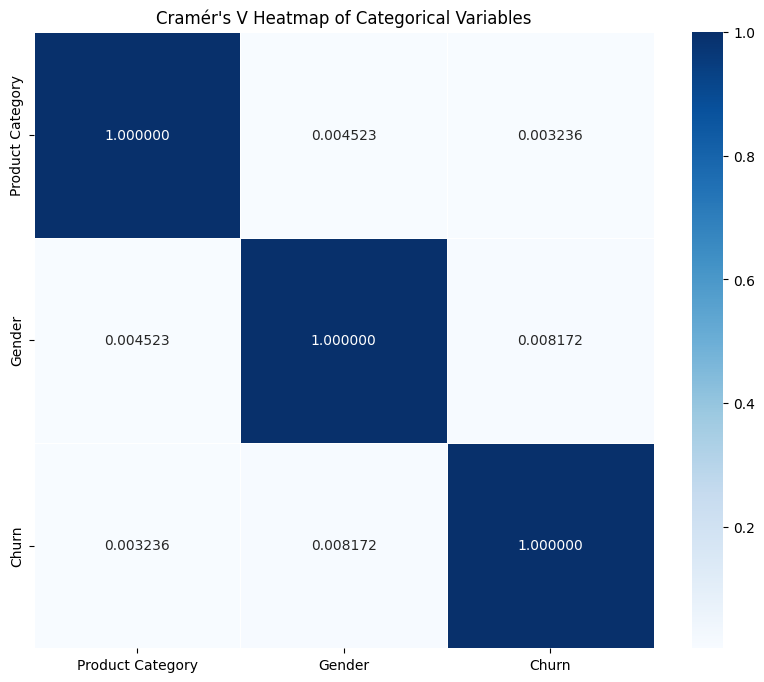

In [26]:
#use chi square correlation matrix/heatmap for categorical attributes

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# List of categorical columns you want to calculate correlations for
categorical_columns = ['Product Category', 'Gender', 'Churn']

# Create an empty dataframe to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V between each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Same column correlation is 1
        else:
            confusion_matrix = pd.crosstab(data[col1], data[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Plot a heatmap of Cramér's V correlations
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="Blues", fmt=".6f", linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()






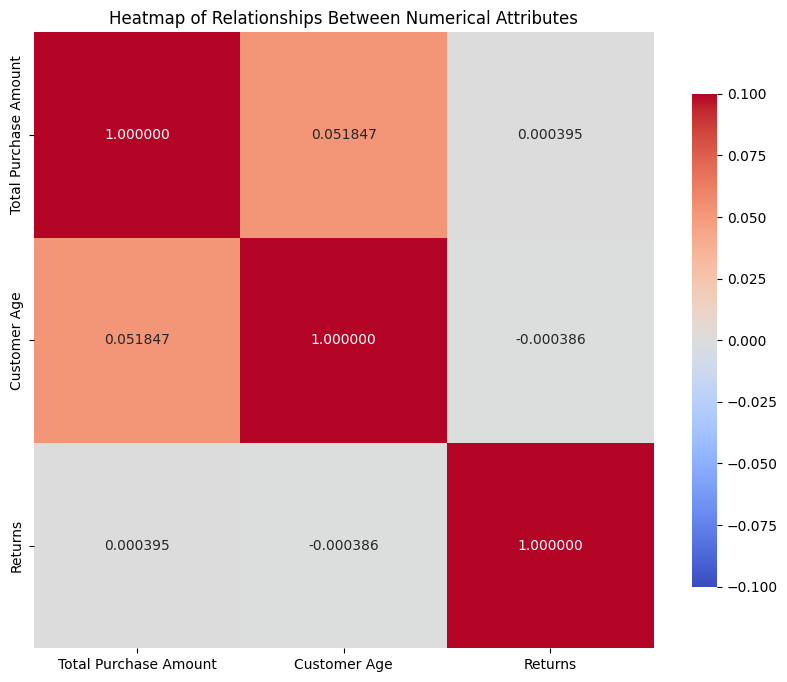

In [27]:
#plot the heatmap for numerical correlations
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, fmt=".6f", cmap='coolwarm', center=0,
            vmin=-0.1, vmax=0.1, cbar_kws={"shrink": .8})  # Use a soft blue color map
plt.title('Heatmap of Relationships Between Numerical Attributes')
plt.show()



Mode for Churn: 0

Counts for Churn (0 and 1):
 Churn
0    200126
1     49874
Name: count, dtype: int64


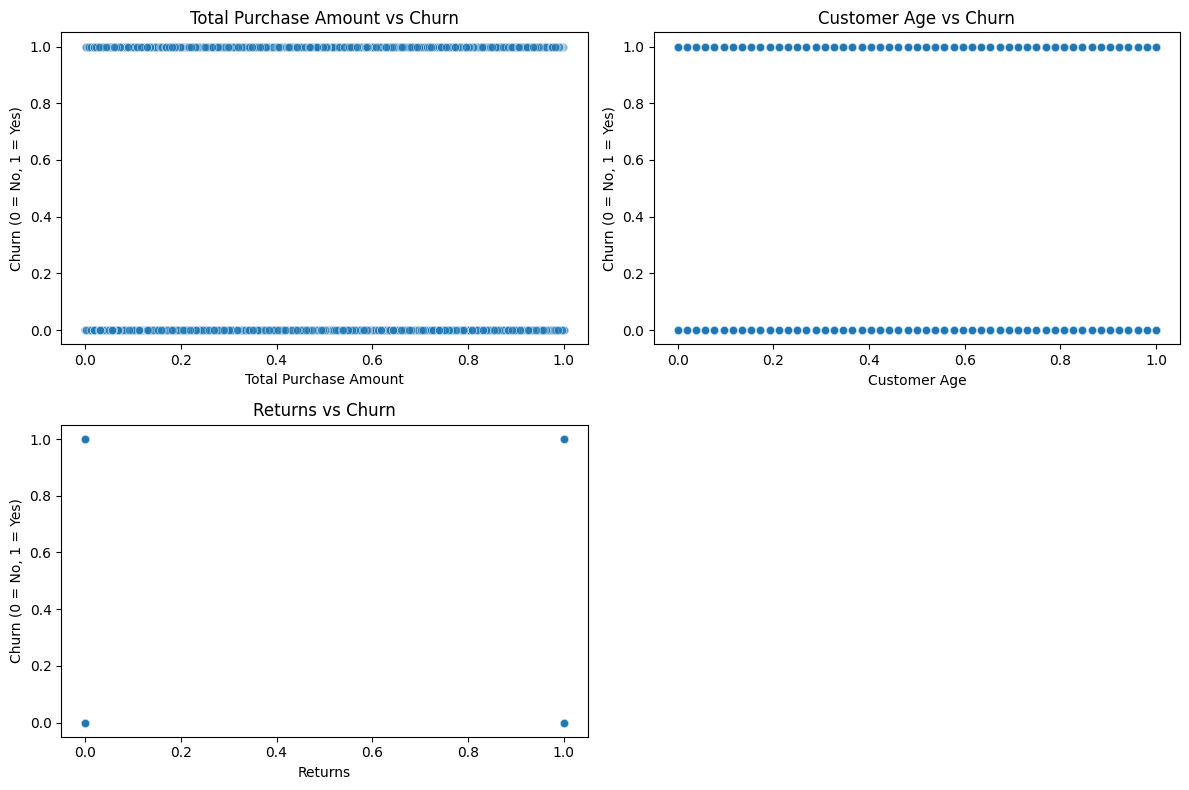

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate mode and counts of 0 and 1 for churn
mode_churn = data['Churn'].mode()[0]  # Get the first mode for churn
counts_churn = data['Churn'].value_counts()

print("\nMode for Churn:", mode_churn)
print("\nCounts for Churn (0 and 1):\n", counts_churn)

# Scatter plots for numerical attributes against churn
num_attributes = len(numerical_attributes)  # Get the number of numerical attributes
cols = 2  # Define number of columns for subplots
rows = (num_attributes + cols - 1) // cols  # Calculate the required number of rows



#visualizations?
plt.figure(figsize=(12, 4 * rows))
for i, attribute in enumerate(numerical_attributes):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=data[attribute], y=data['Churn'], alpha=0.6)
    plt.title(f'{attribute} vs Churn')
    plt.xlabel(attribute)
    plt.ylabel('Churn (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


Analysis for the attribute to
be considered at the output to be predicted.

In [29]:
#normalize numeric variables using Min-Max scaling to the numerical attributes

scaler = MinMaxScaler()
data[numerical_attributes] = scaler.fit_transform(data[numerical_attributes])

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 78366 to 132762
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer ID                 250000 non-null  int64         
 1   Purchase Date               250000 non-null  datetime64[ns]
 2   Product Category            250000 non-null  object        
 3   Product Price               250000 non-null  int64         
 4   Quantity                    250000 non-null  int64         
 5   Total Purchase Amount       250000 non-null  float64       
 6   Payment Method              250000 non-null  object        
 7   Customer Age                250000 non-null  float64       
 8   Returns                     202404 non-null  float64       
 9   Customer Name               250000 non-null  object        
 10  Age                         250000 non-null  int64         
 11  Gender                      250000 non-n

In [30]:
import pandas as pd

def check_data_cleanliness(data):
    # Check for missing values
    if data.isnull().values.any():
        print("Data contains missing values.\n")
        print("Summary of missing values per column:")
        print(data.isnull().sum())
    else:
        print("No missing values found in the data.")

    # Check for duplicate rows
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print(f"\nData contains {duplicates} duplicate rows.")
    else:
        print("\nNo duplicate rows found.")

    # Check for any unexpected data types
    print("\nData types of each column:")
    print(data.dtypes)

# Replace missing values in the 'Returns' column with the mean value of the column
data['Returns'] = data['Returns'].fillna(data['Returns'].mean())

# Verify that there are no more missing values in the 'Returns' column
print(data['Returns'].isnull().sum())
print("\nUpdated Data Preview:")
print(data.head())  # Display the first few rows to verify the update

# Example usage:
# Assuming your data is already loaded into a DataFrame called 'data'
check_data_cleanliness(data)


0

Updated Data Preview:
        Customer ID       Purchase Date Product Category  Product Price  \
78366         25337 2020-01-01 00:15:00             Home             32   
249751        32242 2020-01-01 00:15:15             Home            161   
201096        14853 2020-01-01 00:22:42            Books             93   
45577         32581 2020-01-01 00:31:11         Clothing            375   
1460          16006 2020-01-01 00:34:38      Electronics            125   

        Quantity  Total Purchase Amount Payment Method  Customer Age  \
78366          2               0.461905           Cash      0.461538   
249751         5               0.512000         PayPal      0.807692   
201096         2               0.112381         PayPal      0.673077   
45577          1               0.432000         PayPal      0.057692   
1460           1               0.295048    Credit Card      0.365385   

         Returns     Customer Name  Age  Gender  Churn  \
78366   0.000000    Justin Sanche

In [31]:
!pip install hmmlearn


In [32]:
from hmmlearn import hmm




#convert categorical columns to numeric codes
data['Product Category Code'] = data['Product Category'].astype('category').cat.codes

data['Gender Code'] = data['Gender'].astype('category').cat.codes

# Create a unique representation of hidden states by combining the relevant attributes

data['Hidden State'] = list(zip(data['Product Category Code'],
                                 data['Normalized Purchase Amount'],
                                 data['Returns']))

# Convert the 'Hidden State' tuples to unique numeric codes for HMM processing
data['Hidden State Code'] = data['Hidden State'].astype('category').cat.codes

# Define hidden states and observed states
hidden_states = data['Hidden State Code'].values.reshape(-1, 1)  # Reshape for HMM
observed_states = data['Churn'].values  # Churn is your observed state

# Initial State Probabilities
initial_state_counts = data['Hidden State Code'].value_counts(normalize=True)
initial_state_probabilities = initial_state_counts.values
print("Initial State Probabilities:", initial_state_probabilities)

# Number of unique hidden states based on all relevant attributes
n_states = len(data['Hidden State Code'].unique())
print(f"Number of Unique Hidden States: {n_states}")

# Transition Counts
transition_counts = np.zeros((n_states, n_states))

# Calculate transition counts based on hidden states
for i in range(len(hidden_states) - 1):
    transition_counts[hidden_states[i], hidden_states[i + 1]] += 1

# Normalize to get transition probabilities
transition_probabilities = (transition_counts.T / transition_counts.sum(axis=1)).T
transition_probabilities = np.nan_to_num(transition_probabilities)  # Handle any NaNs
print("\nTransition Probabilities:\n", transition_probabilities)

# Emission Probabilities
n_observed_states = len(np.unique(observed_states))
emission_counts = np.zeros((n_states, n_observed_states))

for i in range(len(hidden_states)):
    emission_counts[hidden_states[i], observed_states[i]] += 1

# Normalize to get emission probabilities
emission_probabilities = (emission_counts.T / emission_counts.sum(axis=1)).T
emission_probabilities = np.nan_to_num(emission_probabilities)  # Handle any NaNs
print("\nEmission Probabilities:\n", emission_probabilities)

# Create the HMM model with the desired number of hidden states
n_components = n_states  # Adjust the number of hidden states
model = hmm.MultinomialHMM(n_components=n_components, n_iter=100)  # Use MultinomialHMM for categorical data

# Drop rows with NaN values to avoid fitting errors
data.dropna(subset=['Hidden State Code', 'Churn'], inplace=True)

# Fit the model on hidden states
model.fit(hidden_states)

# Predict hidden states based on the fitted model
hidden_state_predictions = model.predict(hidden_states)


Initial State Probabilities: [0.030808 0.030776 0.030632 0.030548 0.030524 0.030496 0.03044  0.030308
 0.03022  0.030216 0.03018  0.030112 0.030052 0.030036 0.029976 0.029972
 0.020552 0.020524 0.020436 0.020368 0.020356 0.020336 0.020332 0.020328
 0.0203   0.020276 0.020252 0.020248 0.020212 0.01998  0.019972 0.019848
 0.014656 0.014576 0.014428 0.014412 0.01422  0.014096 0.014088 0.014084
 0.009724 0.009712 0.009552 0.009536 0.009492 0.00936  0.009312 0.009136]
Number of Unique Hidden States: 48

Transition Probabilities:
 [[0.02922338 0.01321057 0.0289565  ... 0.01908193 0.00974113 0.02215105]
 [0.02606044 0.01303022 0.02911006 ... 0.01829775 0.00637649 0.02134738]
 [0.02962274 0.01288523 0.03148247 ... 0.01939426 0.00996281 0.01899575]
 ...
 [0.02643701 0.01482075 0.02743841 ... 0.01682355 0.01081514 0.02002804]
 [0.02878007 0.01073883 0.03006873 ... 0.01804124 0.01116838 0.01975945]
 [0.02861749 0.01551794 0.02942362 ... 0.02095929 0.00886739 0.02015316]]


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



Emission Probabilities:
 [[0.80410995 0.19589005]
 [0.78957582 0.21042418]
 [0.79981403 0.20018597]
 [0.81162298 0.18837702]
 [0.79727428 0.20272572]
 [0.79327372 0.20672628]
 [0.80348323 0.19651677]
 [0.80590238 0.19409762]
 [0.80704764 0.19295236]
 [0.79853095 0.20146905]
 [0.79803493 0.20196507]
 [0.79399817 0.20600183]
 [0.81329525 0.18670475]
 [0.79905634 0.20094366]
 [0.80167709 0.19832291]
 [0.79864194 0.20135806]
 [0.81068917 0.18931083]
 [0.80185553 0.19814447]
 [0.79671485 0.20328515]
 [0.80147685 0.19852315]
 [0.80013236 0.19986764]
 [0.79952861 0.20047139]
 [0.7974753  0.2025247 ]
 [0.7987748  0.2012252 ]
 [0.80114083 0.19885917]
 [0.80512821 0.19487179]
 [0.79389163 0.20610837]
 [0.79341259 0.20658741]
 [0.79555738 0.20444262]
 [0.80309258 0.19690742]
 [0.80585577 0.19414423]
 [0.80657396 0.19342604]
 [0.79693637 0.20306363]
 [0.80834317 0.19165683]
 [0.80578859 0.19421141]
 [0.8028028  0.1971972 ]
 [0.79775723 0.20224277]
 [0.79901153 0.20098847]
 [0.79818505 0.20181495]

In [33]:
import numpy as np

# Define the sequence of observations
observations_list = [0, 0, 0, 1, 1, 1]  # Example sequence of churn (0) and no churn (1)
observations_sequence = np.array(observations_list).reshape(-1, 1)

# Assuming you have defined your states somewhere earlier
observations = ['No Churn', 'Churn']  # Example of states for better readability

# Print the sequence of observations
print('Sequence of Observations:', ' '.join([observations[x] for x in observations_list]))
print('Observations Sequence:\n', observations_sequence)

# Calculate the log probability and decode the hidden states
log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths=len(observations_sequence),
                                                algorithm='viterbi')

# Convert log probability to actual probability
probability = np.exp(log_probability)

# Print results
print('Log Probability:', log_probability)
print('Estimated Probability of Churn based on Hidden States Sequence:', probability)

# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)


Sequence of Observations: No Churn No Churn No Churn Churn Churn Churn
Observations Sequence:
 [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]
Log Probability: -3.1434981017196986
Estimated Probability of Churn based on Hidden States Sequence: 0.04313165478331788
Most likely hidden states: [ 8  9 17  0 47 39]


In [34]:

unique_hidden_states = np.unique(hidden_states, axis=0)  # Get unique rows
num_hidden_states = len(unique_hidden_states)
print("Number of Unique Hidden States:", num_hidden_states)

Number of Unique Hidden States: 6
